# Sharpe Ratio Optimization

* Sharpe Ratio 1 good
* Sharpe Ratio of 2 is very good
* Sharpe Ratio of 3 or higher is excellent
* How can we optimize the portfolio holdings?

We could just guess and check a bunch of random allocatino and see which one has the best sharpe ratiio.

This allows us to calculate the sharpe ratio for thousands of randomly selected allocatinos.

We can then plot the allocationo on a chart showing return vs volatility, colored by the sharpe ratio.

We can create an minimization, for our optimizatin algorthm

y = x ^ 2

y = (2 - x) ^2 ---> x = 2

The idea of a minimizer will allow us to build an optimizer.
SciPy can do the heavy math for us!

Maximize the sharpe ratio meaning we can create an optimzer that will atttempt to minizme the negative sharpe ratio.

inverse the sharpe ratio and optimize it.

Efficient frontier - Markowitz Modern Portfolio Theory is the top left curve to the sharpe ratio 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
aapl = pd.read_csv("data/AAPL_CLOSE", index_col='Date',parse_dates=True)

In [4]:
cisco = pd.read_csv("data/CISCO_CLOSE", index_col='Date',parse_dates=True)

In [5]:
ibm = pd.read_csv("data/IBM_CLOSE", index_col='Date',parse_dates=True)

In [6]:
amzn = pd.read_csv("data/AMZN_CLOSE",index_col='Date',parse_dates=True)

In [7]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [8]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [9]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [11]:
# Pearson correlation coefficient
# how correlated is cisco to appl
# use for pairs trading
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [12]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [13]:
# Move from arthimatic to logarithmic
# to detrend or normalize 
log_returns = np.log(stocks/stocks.shift(1))
log_returns.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


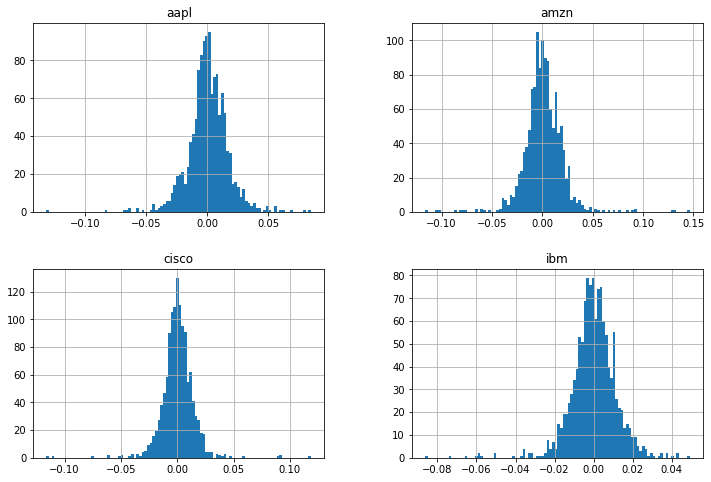

In [16]:
log_returns.hist(bins=100,figsize=(12,8));

In [17]:
log_returns.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [18]:
log_returns.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [19]:
log_returns.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [22]:
print(stocks.columns)
np.random.seed(101)

weights = np.array(np.random.random(4))
print("Random weights")
print(weights)

# this is a normalization technique
print('rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random weights
[0.51639863 0.57066759 0.02847423 0.17152166]
rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [23]:
#Expected return
print("Expected Portfolio Return")
expected_return = np.sum(log_returns.mean() * weights * 252)
expected_return

Expected Portfolio Return


0.15599272049632004

In [24]:
# Expected Volatility or Variance
# Using clever linear algebra to run faster
print("Expected Volatility")
expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252,weights)))
expected_vol

Expected Volatility


0.18502649565909488

In [25]:
# Sharpe Ratio
print("Sharpe Ratio")
SR = expected_return / expected_vol
SR

Sharpe Ratio


0.8430831483926032

In [28]:
# Now lets do all of this but thousands of times over

number_of_portfolios = 25000
all_weights = np.zeros((number_of_portfolios,len(stocks.columns)))
returns_array = np.zeros(number_of_portfolios)
vol_array = np.zeros(number_of_portfolios)
sharpe_array = np.zeros(number_of_portfolios)

for index in range(number_of_portfolios):
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    all_weights[index,:] = weights
    
    returns_array[index] = np.sum(log_returns.mean() * weights * 252)
    vol_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252,weights)))
    
    sharpe_array[index] =  returns_array[index] / vol_array[index]

In [29]:
sharpe_array.max()

1.0292100564846756

In [30]:
# Find index location
sharpe_array.argmax()

10851

In [31]:
# show optimal allocations
all_weights[1420,:]

array([0.31653603, 0.33647641, 0.20526537, 0.14172219])

In [38]:
max_sr_returns = returns_array[sharpe_array.argmax()]
max_sr_vol = vol_array[sharpe_array.argmax()]

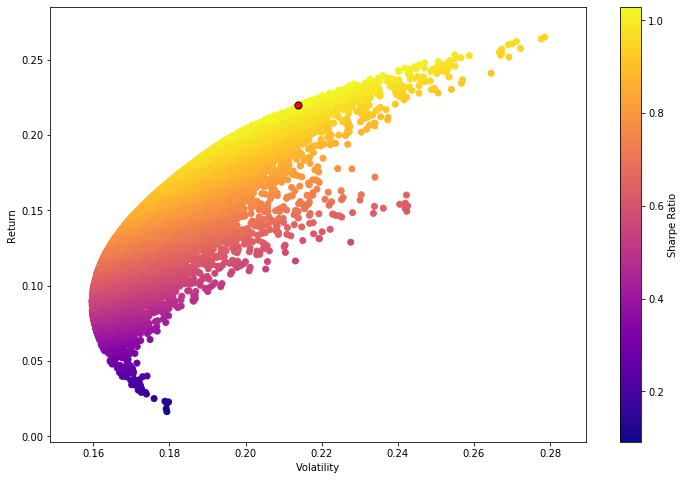

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,returns_array,c=sharpe_array, cmap='plasma');
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_returns,c='red',s=50,edgecolors='black');

In [41]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights * 252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [42]:
from scipy.optimize import minimize
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [43]:

# given a weight allocation then return the sharpe ratio
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 

In [44]:
def check_sum(weights):
    return np.sum(weights) - 1

In [45]:
# equation type constraint
cons = ({'type':'eq','fun':check_sum})

In [46]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [47]:
init_guess = [0.25,0.25,0.25,0.25]

In [49]:
# Sequential Least Squares Algorithm
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP',bounds=bounds, constraints=cons)
opt_results

     fun: -1.030716870335278
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [50]:
# Jacobian
opt_results.jac

array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])

In [51]:
opt_results.x

array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [52]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [53]:
# Efficient frontier
# The lowest risk possible for a given return
fronter_y = np.linspace(0,0.3,100)

In [54]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [55]:
frontier_vol = []

for possible_return in fronter_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_volatility, init_guess,method='SLSQP',
                     bounds=bounds,
                     constraints=cons)
    
    frontier_vol.append(result['fun'])

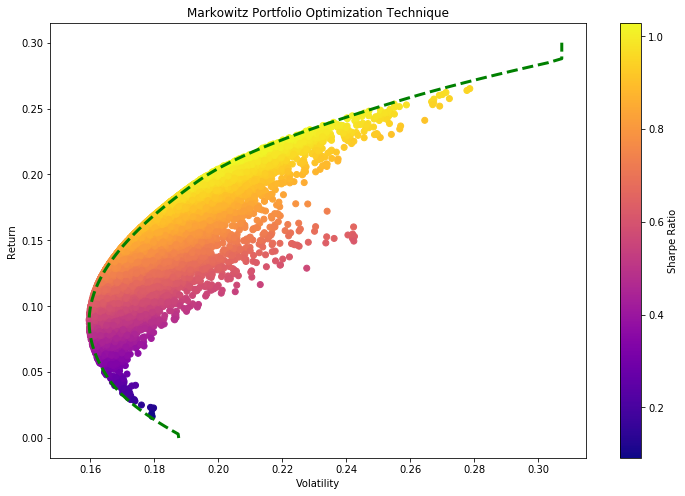

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,returns_array,c=sharpe_array, cmap='plasma');
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Markowitz Portfolio Optimization Technique')

plt.plot(frontier_vol,fronter_y,'g--',linewidth=3);